# Module 2 - Neural NLP

## Contents
- Part 1: Backpropogation and NN basics
    - 1.1 Neural Network review
    - 1.2 Computing Gradients by hand
    - 1.3 Math background and backpropagation
    - 1.4 An example backpropagation and automatic differentiation  
- Part 2: Dependency parsing
    - 2.1 Syntactic structure
    - 2.2 Ambiguous examples
    - 2.3 Dependency grammar and treebanks
    - 2.4 Transition-based dependency parsing
    - 2.5 Neural dependency parsing

## Misc and Keywords
- A *derivative* is a mathematical way to measure how a function changes as its input changes—in other words, it tells you the slope of the function at any given point. If you think of a function like a hill or a curve on a graph, the derivative at a point tells you how steep that hill is right there.
- A *partial derivative* measures how a function with multiple inputs changes when you change just one input, while keeping the others fixed.
- *Automatic differentiation* is a technique used by computers to automatically and efficiently compute derivatives of functions, no matter how complex, by breaking calculations into simple steps and applying the chain rule. This is what allows machine learning frameworks (like TensorFlow or PyTorch) to quickly and accurately calculate all the gradients needed for training neural networks.

## Part 1: Backpropogation and NN basics

### 1.1 Neural Network review

#### Matrix notation for a layer

We have

$$
a_1 = f(W_{11}x_1 + W_{12}x_2 + W_{13}x_3 + b_1)
$$

$$
a_2 = f(W_{21}x_1 + W_{22}x_2 + W_{23}x_3 + b_2)
$$

etc.

**In matrix notation**

$$
z = Wx + b
$$

$$
a = f(z)
$$

where $W$ is the weight matrix for the layer, $x$ is the input vector, $b$ is the bias vector, $z$ is the pre-activation vector, and $f$ is the activation function applied element-wise.

Activation $f$ is applied element-wise:

$$
f([z_1, z_2, z_3]) = [f(z_1), f(z_2), f(z_3)]
$$

#### Activation Functions

*Non-linearities*, or *activation functions*, are what give neural networks their real power—they allow the network to learn and model complex patterns that go far beyond simple straight lines or flat planes. If we only used linear operations (like multiplying by weights and adding biases), no matter how many layers we stacked, the entire network could only represent a single linear transformation—basically, it could only draw straight lines to fit data. But most real-world problems, like recognising objects in photos or understanding language, are far more complicated and require the ability to capture twists, curves, and intricate relationships in the data. By inserting non-linear activation functions (like sigmoid, tanh, or ReLU) after each layer, we let the network stack and combine simple operations in a way that creates rich, flexible decision boundaries. This non-linearity is essential for deep learning, as it enables neural networks to approximate virtually any function and solve the wide range of tasks we throw at them.

- **Logistic (Sigmoid)**

$
f(z) = \sigma(z) = \frac{1}{1 + e^{-z}}
$

- **tanh**

$
f(z) = \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$

- **Hard tanh**

$
f(z) = \begin{cases}
-1 & \text{if } z < -1 \\
z & \text{if } -1 \leq z \leq 1 \\
1 & \text{if } z > 1
\end{cases}
$

- **Rectified Linear Unit (ReLU)**

$
f(z) = \max(0, z)
$

- **Leaky ReLU**

$
f(z) = \begin{cases}
z & \text{if } z \geq 0 \\
\alpha z & \text{if } z < 0
\end{cases}
$

where $\alpha$ is a small positive constant (e.g., $0.01$).

- **Swish**

$
f(z) = x \cdot \sigma(z) = z \cdot \frac{1}{1 + e^{-z}}
$

- **GELU (Gaussian Error Linear Unit)**

$
f(z) = z \cdot \Phi(z)
$

where $\Phi(z)$ is the cumulative distribution function of the standard normal distribution.

An approximate version commonly used is:

$
f(z) \approx 0.5z \left[1 + \tanh\left(\sqrt{\frac{2}{\pi}} \left(z + 0.044715z^3\right)\right)\right]
$

---

### 1.2 Computing Gradients by hand

#### A simple example

Calculating the gradients, given a function with 1 output and 1 input $f(x)=x^3$

Its gradient (slope) is it's derivative $\frac{df}{dx}=3x^2$

So, "*How much will the output change if we change the input a bit?*":
- At $x=1$ it changes about 3 times as much: $1.01^3 = 1.03$
- At $x=4$ it changes about 48 times as much: $4.01^3 = 64.48$

**What are $\frac{df}{dx}$?**

The symbol $\frac{df}{dx}$ (pronounced "dee-f by dee-x") is mathematical shorthand for "the derivative of $f$ with respect to $x$." It tells you how much the function $f(x)$ changes when you make a tiny change in $x$.

The top part, $df$, stands for a tiny change in the function $f(x)$.

The bottom part, $dx$, stands for a tiny change in $x$.

So $\frac{df}{dx}$ measures how sensitive $f(x)$ is to $x$ at any point, in other words, the slope.

For example, if $f(x) = x^3$, then $\frac{df}{dx} = 3x^2$.
If you plug in $x = 2$, you get $\frac{df}{dx} = 12$, meaning at $x=2$, a small increase in $x$ makes $f(x)$ increase by about $12$ times as much.

#### Gradients

Given a function with 1 outputs and $n$ inputs $f(x) = f(x_1, x_2, ..., x_n)$, its gradient is a vector of partial derivatives with respect to each input

$$
\frac{\partial{f}}{\partial{x}} = \left[ \frac{\partial{f}}{\partial{x_1}}, \frac{\partial{f}}{\partial{x_2}}, ..., \frac{\partial{f}}{\partial{x_n}} \right]
$$

If we now go beyond this and have a function with $m$ outputs and $n$ inputs i.e. $f(x) = [f_1(x_1, x_2, ..., x_n), ..., f_m(x_1, x_2, ..., x_n)]$, what we then get for the graidents is known as a jacobian matrix. Which is a matrix of all of the patrial derivatives

#### The Chain Rule

The **chain rule** is a fundamental rule in calculus for finding the derivative of a composition of functions, that is, when one function is applied inside another. This is especially important in neural networks, where each layer applies a function to the result of the previous layer.

Simply put, the chain rule helps us track how changing an input affects the output when there are several steps or layers in between, by multiplying the effect at each step.

Suppose you have:

- $y = f(u)$
- $u = g(x)$

So $y$ is really a function of $x$:
$$
y = f(g(x))
$$

The **chain rule** states:

$$
\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}
$$

That is, the rate at which $y$ changes with respect to $x$ is the product of:
- How $y$ changes with $u$ ($\frac{dy}{du}$)
- How $u$ changes with $x$ ($\frac{du}{dx}$)


#### Example: Jacobian of an Elementwise Activation Function

Suppose we have an activation function $f$ applied elementwise to a vector $\mathbf{z}$:

$$
\mathbf{a} = f(\mathbf{z})
$$

where $\mathbf{z} = \begin{bmatrix} z_1 \\ z_2 \\ \vdots \\ z_n \end{bmatrix}$ and $f$ acts on each element:

$$
a_i = f(z_i)
$$

The **Jacobian matrix** $J$ of $\mathbf{a}$ with respect to $\mathbf{z}$ contains all partial derivatives:

$$
J_{ij} = \frac{\partial a_i}{\partial z_j}
$$

For an **elementwise** function, each $a_i$ depends only on $z_i$, so:

$$
J_{ij} = 
\begin{cases}
f'(z_i) & \text{if } i = j \\
0 & \text{if } i \neq j
\end{cases}
$$

So the Jacobian is a **diagonal matrix**:

$$
J = 
\begin{bmatrix}
f'(z_1) & 0 & \cdots & 0 \\\\
0 & f'(z_2) & \cdots & 0 \\\\
\vdots & \vdots & \ddots & \vdots \\\\
0 & 0 & \cdots & f'(z_n)
\end{bmatrix}
$$

**Example:** If $f(z) = \tanh(z)$, then $f'(z) = 1 - \tanh^2(z)$, so the Jacobian is:

$$
J = \operatorname{diag}(1 - \tanh^2(z_1),\; 1 - \tanh^2(z_2),\; \ldots,\; 1 - \tanh^2(z_n))
$$

##### **Neural Network Example**

In a neural network, if each layer's output becomes the input to the next, you use the chain rule to compute how a change in an earlier layer affects the final output. For example, if the loss $L$ depends on $z$, and $z$ depends on $x$:

$$
\frac{dL}{dx} = \frac{dL}{dz} \cdot \frac{dz}{dx}
$$


#### Step-by-step example for SGD

Stochastic Gradient Descent (SGD) is an algorithm for optimising parameters (like weights and biases in a neural network) to minimise a loss function. Unlike "batch" gradient descent, which uses the whole dataset to compute the gradient, **SGD updates parameters using just a single (or a small batch of) training example(s) at a time**, making it much faster for large datasets.

Suppose you have a simple model:

$$
y = wz + b
$$

And a loss function (let's use Mean Squared Error for a single sample):

$$
L = (y_{true} - y_{pred})^2
$$

Given:
- A single data point $(z, y_{true})$
- Current parameter values $w$ and $b$
- Learning rate $\eta$

##### Step 1: Forward Pass (Prediction)

- Compute the model output:  
  $$
  y_{pred} = wz + b
  $$

##### Step 2: Compute the Loss

- Compute loss for this example:  
  $$
  L = (y_{true} - y_{pred})^2
  $$

##### Step 3: Compute the Gradients

- Gradient of loss with respect to $w$:
  $$
  \frac{\partial L}{\partial w} = -2z(y_{true} - y_{pred})
  $$
- Gradient of loss with respect to $b$:
  $$
  \frac{\partial L}{\partial b} = -2(y_{true} - y_{pred})
  $$

##### Step 4: Update the Parameters

- Update $w$:
  $$
  w_{	ext{new}} = w - \eta \frac{\partial L}{\partial w}
  $$
- Update $b$:
  $$
  b_{	ext{new}} = b - \eta \frac{\partial L}{\partial b}
  $$

##### Step 5: Repeat

- Repeat for the next randomly chosen training example.

#### Summary Table

| Step                | Formula                                              |
|---------------------|------------------------------------------------------|
| Prediction          | $y_{pred} = wz + b$                                 |
| Loss                | $L = (y_{true} - y_{pred})^2$                       |
| Gradient (w)        | $\frac{\partial L}{\partial w} = -2z(y_{true} - y_{pred})$ |
| Gradient (b)        | $\frac{\partial L}{\partial b} = -2(y_{true} - y_{pred})$  |
| Update rule (w, b)  | $w \leftarrow w - \eta \frac{\partial L}{\partial w}$     |
|                     | $b \leftarrow b - \eta \frac{\partial L}{\partial b}$     |

#### Layman Details

Think of SGD as learning by trial and error: you try out your model on one piece of data, see how wrong it is, and make a small tweak to make it a bit better. Instead of waiting to see the whole dataset before making any changes, you adjust as you go, learning from each mistake in real time. This makes learning faster and often helps the model find better solutions by adding a bit of randomness. Over many rounds, these small, repeated improvements add up, letting the network gradually discover the best parameters for the task.

---


### 1.3 Math background and backpropagation

#### Applying the Chain Rule in Backpropagation: A Step-by-Step Example

Let's say we have the following sequence of computations in a neural network:

- $x$ = input vector
- $z = Wx + b$ (a linear transformation: $W$ is a matrix of weights, $b$ is a bias vector)
- $h = f(z)$ (an activation function $f$ applied to each entry of $z$)
- $s = u^T h$ (a single output: the dot product of $u$ and $h$)
- $L = L(s)$ (a loss function, for example mean squared error)

##### How do we compute the gradients (slopes) for learning?

When training a neural network, we want to know:  How does changing each value (or parameter) affect the final loss?

This is where the *chain rule* comes in! It lets us break down the influence, step by step, by multiplying the effect of each layer.

##### Step 1: Understand the Chain of Computation

We can draw the chain like this:

$$
x \longrightarrow z \longrightarrow h \longrightarrow s \longrightarrow L
$$

Or, in words:  
- $x$ feeds into $z$  
- $z$ goes through the activation to make $h$  
- $h$ is combined into $s$  
- $s$ is compared to the answer to get $L$

##### Step 2: The Chain Rule Formula

The **chain rule** for derivatives says:

$$
\frac{dL}{dz} = \frac{dL}{ds} \cdot \frac{ds}{dh} \cdot \frac{dh}{dz}
$$

This tells us:  
**To find out how $z$ affects $L$, multiply together how each stage affects the next, all the way from $z$ to $L$.**

##### Step 3: Compute Each Part

Let's look at each part in more detail, using simple explanations:

###### 1. $\frac{dL}{ds}$:  
- How much does the loss change if $s$ changes?
- If $L = \frac{1}{2}(s - y)^2$, then $\frac{dL}{ds} = s - y$ (just the error).

###### 2. $\frac{ds}{dh}$:  
- How much does $s$ change if $h$ changes?
- Since $s = u^T h$, this is just $u$ (the vector $u$).

###### 3. $\frac{dh}{dz}$:  
- How much does $h$ change if $z$ changes?
- $h = f(z)$, so this is $f'(z)$ — the derivative of the activation function, calculated for each element (for example, if $f$ is ReLU, $f'(z)$ is $1$ when $z > 0$, $0$ otherwise).

##### Step 4: Multiply Them Together

To get the gradient of $L$ with respect to $z$:

$$
\frac{dL}{dz} = \frac{dL}{ds} \cdot \frac{ds}{dh} \circ \frac{dh}{dz}
$$

- The $\circ$ means **elementwise multiplication** (each element in the vector times the same position in the other).
- So, if $u = [u_1, u_2, u_3]$ and $f'(z) = [a, b, c]$, then $u \circ f'(z) = [u_1 a, u_2 b, u_3 c]$.

**With numbers:**  
If $s - y = 2$, $u = [3, 4]$, $f'(z) = [0.5, 1]$, then:

$$
\frac{dL}{dz} = 2 \times [3, 4] \circ [0.5, 1] = 2 \times [1.5, 4] = [3, 8]
$$

##### Step 5: Gradients for Each Parameter

**These tell you how to update your parameters to reduce the loss!**

- **For $W$ (weights matrix):**
  $$
  \frac{dL}{dW} = \frac{dL}{dz} \cdot x^T
  $$
  (Multiply your calculated gradient for $z$ by the input $x$, transposed.)

- **For $b$ (bias):**
  $$
  \frac{dL}{db} = \frac{dL}{dz}
  $$
  (The gradient for $z$ just passes straight through.)

- **For $u$ (output vector):**
  $$
  \frac{dL}{du} = \frac{dL}{ds} \cdot h
  $$
  (How the loss changes with $s$, times the activation $h$.)

##### In Plain English

The chain rule lets us “chain together” the effects of each step in our computation, so we can work backwards and figure out exactly how to change our model to improve it. In backpropagation, this means multiplying together how much each layer's output affects the loss, all the way back through the network.


##### Forward Propogation

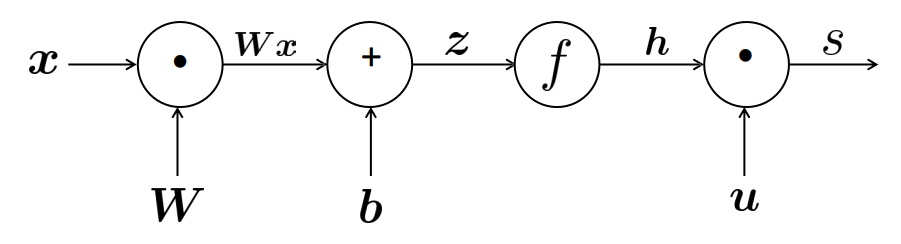

##### Backward Propogation

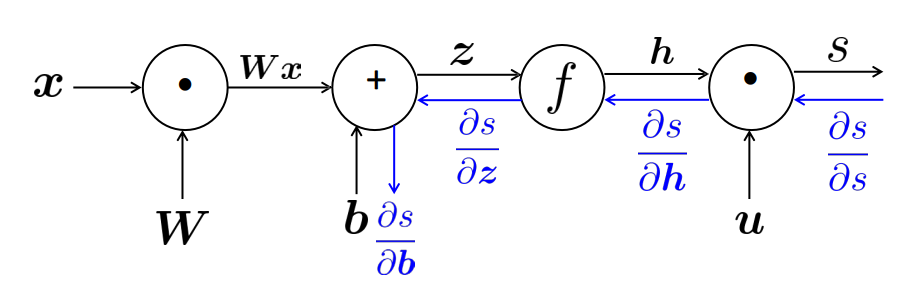

### 1.4 An example backpropagation and automatic differentiation  

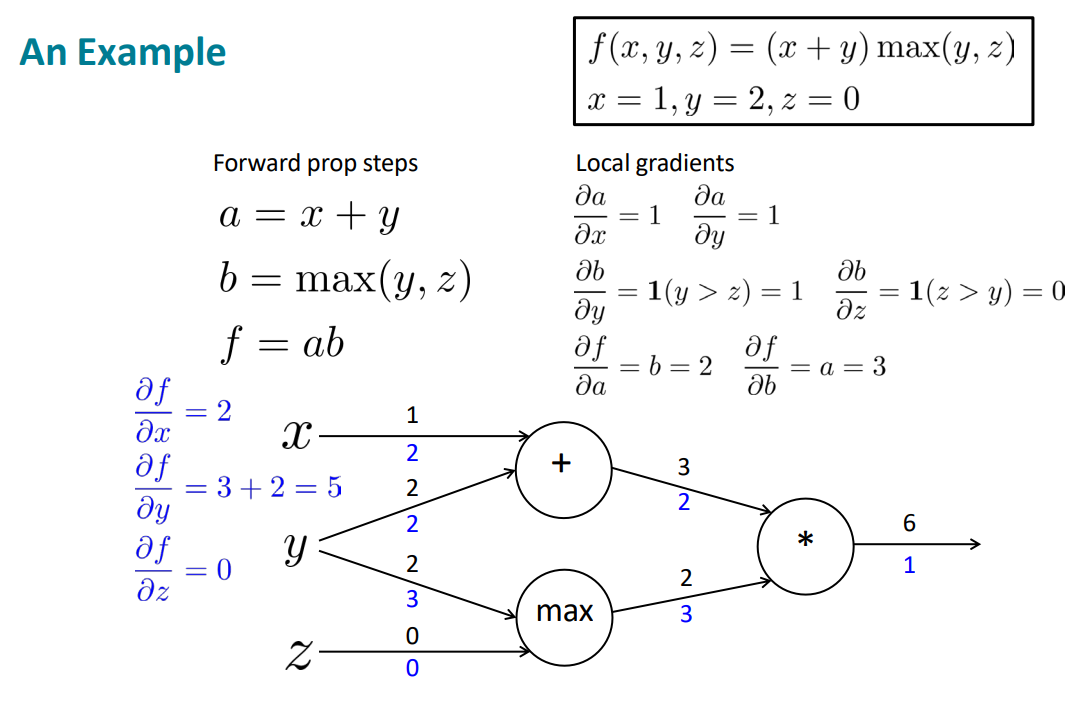

Different operations in the nodes result in the gradient being distributed differently:
- Plus(+) distributes the gradient evenly
- Max(a, b) 'routes' the gradient to the maximum node, the other gets 0
- Multiply(a*b) switches the coefficients so the a = b and vice versa.

A simple implemented example of forwards and backwards is shown below:

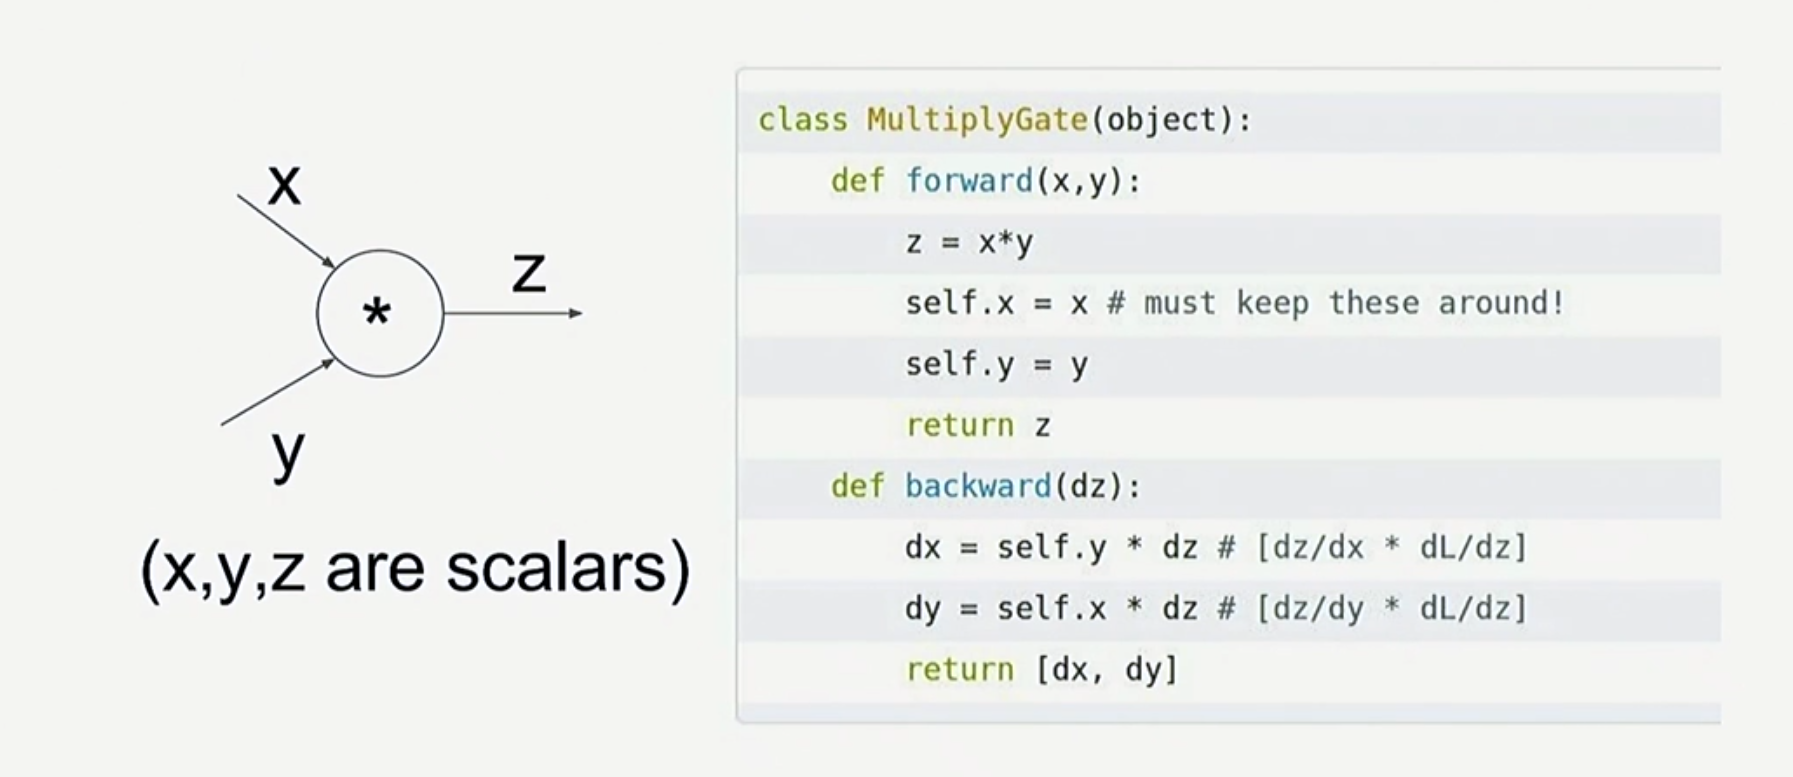

## Part 2: Dependency parsing

- *Dependency structure* shows which words depend on (modify, attach to, or are arguments of) which other words.
- A *context-free grammar* (CFG) is a set of rules that shows how to build sentences out of smaller parts, in a way that doesn’t depend on the specific words around each part.
- A *phrase structure grammar* is a set of rules that shows how words combine into phrases and how those phrases combine to create sentences.

### 2.1 Syntactic structure

Why is structure important? Humans communicate complex ideas by composing words together into bigger units to convery complex meanings. A model needs to understand sentence structure in  order to able to interpret the language correctly.

#### Types of Words (Parts of Speech)

- **Noun:** A word that names a person, place, thing, or idea. *Examples: cat, school, happiness, John*
- **Adjective:** A word that describes a noun, giving more information about it.  *Examples: blue, tall, happy, expensive*
- **Determiner:** A word placed in front of a noun to show which thing you mean.  *Examples: the, a, an, some, my, this, that*
- **Verb:**  A word that expresses an action or a state.  *Examples: run, eat, is, think*
- **Adverb:**  A word that describes a verb, adjective, or another adverb—often telling how, when, or where. *Examples: quickly, very, yesterday, here*
- **Pronoun:**  A word that replaces a noun. *Examples: he, she, it, they, you*
- **Preposition:**  A word that shows the relationship between a noun (or pronoun) and other words in a sentence.  *Examples: in, on, under, before, after*
- **Conjunction:**  A word that joins words, phrases, or clauses together.  *Examples: and, but, because, or*
- **Interjection:**  A word or phrase that expresses emotion or surprise.  *Examples: oh!, wow!, ouch!*

#### Types of Phrases

A **phrase** is a group of words that acts as a single unit in a sentence. Here are the most common types:

- **Noun Phrase:**  A group of words built around a noun.  *Example: the big red ball, my new phone*
- **Verb Phrase:**  A group of words built around a verb.  *Example: is running fast, has been sleeping*
- **Adjective Phrase:**  A group of words that together describe a noun.  *Example: full of energy, happy to help*
- **Adverb Phrase:**  A group of words that describe how, when, where, or why something happens.  *Example: very quickly, in the morning, with great care*
- **Prepositional Phrase:**  A group of words beginning with a preposition and ending with a noun or pronoun.  *Example: under the table, after the show, with my friends*



### 2.2 Ambiguous examples

Provided various examples such as 'Scientists count whales from space'

When providing models with commands you need to determine the ambiguity in what you are saying for example:

*"Shuttle veteran and longtime NASA executive Fred Gregory appointed to board"*

This could mean that Fred and a shuttle veteran have been appointed, or that Fred is a shuttle veteran and has been appointed. 

### 2.3 Dependency grammar and treebanks

#### Dependency grammar 
A type of grammar that focuses on the relationships between individual words in a sentence.  
Instead of grouping words into phrases (like in phrase structure grammar), it looks at how **each word depends on another word**, usually a main verb.

- Every word (except one) is linked to a **head word** it depends on.
- The main verb is usually the **root** of the sentence.
- Words that depend on the head are called **dependents**.

##### Example:
In the sentence:
**"The cat eats fish."**

- "eats" is the main verb (head of the sentence).
- "cat" depends on "eats" (subject).
- "fish" depends on "eats" (object).
- "The" depends on "cat" (determiner).

This creates a **dependency structure** (like a tree), where arrows show which words depend on which. A **dependency structure** is a diagram or data format that shows the grammatical relationships between words in a sentence.

```
        eats
       /    \
     cat    fish
    /
  the
```

- **"eats"** is the root (main verb).
- **"cat"** depends on "eats" as the subject.
- **"fish"** depends on "eats" as the object.
- **"The"** depends on "cat" as a determiner.

Each arrow in the tree shows a **dependency link**, and these links often have labels like:
- `nsubj` → nominal subject  
- `obj` → object  
- `det` → determiner

#### Treebanks

A **treebank** is a collection of sentences that have been annotated with grammatical structure.

There are two main types:
- **Constituency treebanks** (based on phrase structure grammar)
- **Dependency treebanks** (based on dependency grammar)

Treebanks are used to:
- Train and test natural language processing (NLP) models
- Study how language works
- Evaluate parsers (tools that analyze sentence structure)

Examples of well-known treebanks:
- Penn Treebank (constituency-based)
- Universal Dependencies (dependency-based, used in many languages)


#### Dependency Parser

A **dependency parser** is a tool or algorithm that analyses a sentence and identifies the grammatical structure by figuring out which words depend on which.

It builds a **dependency tree** that shows:
- The **main verb** (root) of the sentence
- The **relationships** between words (like subject, object, modifier, etc.)
- Which words **depend** on which others

The structure:
- **Input:** A raw sentence (e.g., "She loves cats")
- **Output:** A structured tree showing grammatical dependencies
- **Labels:** Each link has a grammatical label like `nsubj`, `obj`, `det`, etc.

Remember, *Dependency grammar* is the theory, whilst a **dependency parser** is the tool that puts the theory into action by analysing real sentences.

#### Sources of Information for Dependency Parsing:

| Source                  | Description                                                                 | Simple Explanation                                  |
|-------------------------|-----------------------------------------------------------------------------|-----------------------------------------------------|
| **Bilexical Affinities** | Measures how likely two specific words are to form a dependency             | Some word pairs naturally go together (e.g., *eat–apple*) |
| **Dependency Distance** | Preferences for dependencies between nearby words                           | Words closer together are more likely to be connected |
| **Intervening Material**| Dependencies usually avoid crossing verbs or punctuation                    | It's rare for words to link across punctuation or other verbs |
| **Valency of Heads**    | How many dependents a word (usually a verb) expects    | Verbs have a preferred number and type of dependents (e.g., *eat* takes two) |


### 2.4 Transition-based dependency parsing


**Transition-based dependency parsing** is a method that builds a dependency tree **step by step**, using a set of actions (called transitions).  
Instead of analysing the whole sentence at once, it processes it **incrementally** by shifting words and connecting them as it goes.

It uses a data structure with three key components:

### Components

| Component | Description |
|----------|-------------|
| **Stack**  | Holds words that are being processed (initially starts with just `ROOT`) |
| **Buffer** | Holds the remaining words in the sentence to be parsed |
| **Arcs**   | Stores the dependency relations that have been created (e.g. `nsubj(dog, barks)`) |

### Common Transitions

- **SHIFT**: Move the first word from the buffer to the stack.
- **LEFT-ARC**: Create a dependency from the top word on the stack to the word just below it, then remove the second-top word.
- **RIGHT-ARC**: Create a dependency from the second-top word on the stack to the top word, then remove the top word from the stack.

### Step-by-Step Example

Sentence:  
**"She eats apples"**

Initial state:
- Stack: `[ROOT]`
- Buffer: `[She, eats, apples]`
- Arcs: `[]`

Steps (simplified):

1. **SHIFT**  
   - Stack: `[ROOT, She]`  
   - Buffer: `[eats, apples]`

2. **SHIFT**  
   - Stack: `[ROOT, She, eats]`  
   - Buffer: `[apples]`

3. **LEFT-ARC (nsubj)**  
   - Creates: `nsubj(eats, She)`  
   - Stack: `[ROOT, eats]`

4. **SHIFT**  
   - Stack: `[ROOT, eats, apples]`  
   - Buffer: `[]`

5. **RIGHT-ARC (obj)**  
   - Creates: `obj(eats, apples)`  
   - Stack: `[ROOT, eats]`

6. **RIGHT-ARC (root)**  
   - Creates: `root(ROOT, eats)`  
   - Stack: `[ROOT]`

Final arcs:
- `nsubj(eats, She)`
- `obj(eats, apples)`
- `root(ROOT, eats)`

### 2.5 Neural dependency parsing

**Neural dependency parsing** refers to using neural networks (especially deep learning models) to predict dependency structures in sentences.

Unlike traditional parsing methods, which use manually crafted features and rules, neural parsers learn to extract features automatically from data, improving accuracy and generalisation.

#### How It Works

At a high level, neural dependency parsing works in **two main stages**:

##### 1. **Representation Learning**
- Each word in a sentence is converted into a **vector** using embeddings (like Word2Vec or contextual embeddings like BERT).
- These vectors capture **meaning, syntax, and context**.
- Neural networks (often LSTMs or Transformers) process the sentence to capture how words relate to each other.

##### 2. **Parsing Decisions**
There are two main neural parsing approaches:

| Approach             | Description |
|----------------------|-------------|
| **Transition-based** | The model predicts the next parsing action (e.g., SHIFT, LEFT-ARC) at each step using the neural representation of the current state (stack, buffer, history). |
| **Graph-based**      | The model scores **all possible head-dependent pairs**, then builds the best dependency tree using these scores (often via a maximum spanning tree algorithm). |

#### What Neural Networks Learn

Neural parsers automatically learn:
- Which words are likely to be **heads** and **dependents**
- The **label** of the relationship (e.g., subject, object, modifier)
- **Long-distance dependencies** and subtle grammatical patterns

They do this **without manually defining features**, by training on annotated sentences from **treebanks**.

#### Example

Sentence:  
**"Dogs chase cats."**

Neural parser might output:
- `nsubj(chase, Dogs)`
- `obj(chase, cats)`
- `root(ROOT, chase)`

Instead of using handcrafted rules, the parser **learns these patterns** by seeing many examples in training.
